# Telco Data: Customer Churn Supposition


## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
from sklearn.metrics import confusion_matrix
# acquire
import env
import seaborn as sns

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import telco_wrangle as tw

In [2]:
# to see all columns in wide datasets
pd.set_option('display.max_columns', None)

## Acquire

* I retrieved my data from the Codeup databases using my acquire.py file
* I retrieved my data on Tuesday, October 25, 2022
* What is the size of your data? There are 24 columns and 7043
* What does each observation represent? Each observation represents the customer's account information 
* What does each column represent? Each column represent a piece of information about the customer's account.  Initial columns represent 

In [3]:
#retrieve data from Codeup sequel database using telco_wrangle 
df = tw.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
# use info to see column names, check for nulls, and sdatatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
# describe to see spread of data
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [6]:
# check rows and columns
# there are 7043 rows and 24 columns
df.shape

(7043, 24)

## Prepare

* List steps taken to clean your data here
* In particular call out how you handle null values and outliers in detail
* You must do this even if you do not do anything or do not encounter any
* Any time there is potential to make changes to the data you must be upfront about the changes you make or do not make

In [7]:
#check for missing values.
df.isnull().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [8]:
# check the data types
df.dtypes

payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
customer_id                  object
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
dtype: object

In [9]:
# see churn rates
df.churn.value_counts() 

No     5174
Yes    1869
Name: churn, dtype: int64

In [10]:
# calculate baseline
churn_baseline = 1869/(5174 + 1869) * 100
churn_baseline

26.536987079369588

In [11]:
# split the data
train, validate, test = tw.prep_telco_data(df)

In [ ]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded


In [12]:
# take a look at the results
train.head()

,payment_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,internet_service_type_Fiber optic,internet_service_type_None,tech_support_No,tech_support_No internet service,tech_support_Yes,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
5919,4,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,71.10,4299.20,No,One year,DSL,Credit card (automatic),1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1915,4,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,No,No,No,Yes,85.45,6028.95,No,One year,Fiber optic,Credit card (automatic),0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
5054,1,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,25.75,882.55,No,Month-to-month,None,Electronic check,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2355,2,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.20,19.20,No,Month-to-month,None,Mailed check,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
6279,2,Male,1,No,No,20,Yes,No,Yes,No,No,Yes,No,No,No,54.00,1055.90,No,One year,DSL,Mailed check,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [13]:
# the df has 3937 rows and 51 columns
train.shape

(3937, 51)

In [14]:
# check colun names and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   payment_type_id                         3937 non-null   int64  
 1   gender                                  3937 non-null   object 
 2   senior_citizen                          3937 non-null   int64  
 3   partner                                 3937 non-null   object 
 4   dependents                              3937 non-null   object 
 5   tenure                                  3937 non-null   int64  
 6   phone_service                           3937 non-null   object 
 7   multiple_lines                          3937 non-null   object 
 8   online_security                         3937 non-null   object 
 9   online_backup                           3937 non-null   object 
 10  device_protection                       3937 non-null   o

In [15]:
# see churn values
train.churn.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

In [16]:
# comparing the before and after churn value comparison
#churn_baseline = 1869/(5174 + 1869) * 100
#churn_baseline =26.536987079369588

train_churn_baseline = 1046/(2891+1046)* 100
train_churn_baseline

26.56845313690627

# univariate exploration

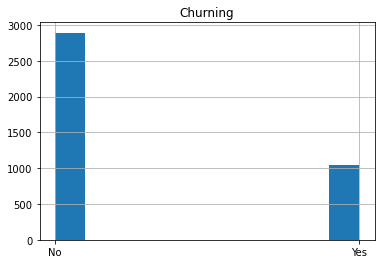

In [18]:
plt.title("Churning")
train.churn.hist()
plt.show()

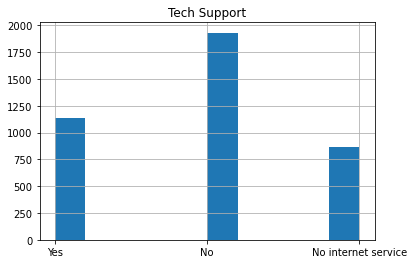

In [21]:
plt.title("Tech Support")
train.tech_support.hist()
plt.show()

In [26]:
train.tech_support_No.value_counts()

0    2006
1    1931
Name: tech_support_No, dtype: int64

In [27]:
# We can call .mean() since 0 and 1 are numeric
print("no tech support")
round(train.tech_support_No.mean(), 3)

no tech support


0.49

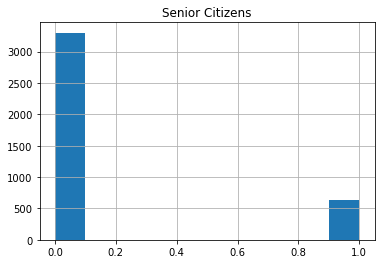

In [22]:
plt.title("Senior Citizens")
train.senior_citizen.hist()
plt.show()

In [28]:
train.senior_citizen.value_counts()

0    3302
1     635
Name: senior_citizen, dtype: int64

In [29]:
# We can call .mean() since 0 and 1 are numeric
print("senior citizen")
round(train.senior_citizen.mean(), 3) 

senior citizen


0.161

In [ ]:
plt.title("payment_type_Bank transfer (automatic)")
train.payment_type_Bank transfer (automatic).hist()
plt.show()

In [ ]:
train.payment_type_Bank transfer (automatic).value_counts()

In [ ]:
# We can call .mean() since 0 and 1 are numeric
print("payment_type_Bank transfer (automatic)")
round(train.payment_type_Bank transfer (automatic).mean(), 3)

In [ ]:
plt.title("payment_type_Credit card (automatic)")
train.payment_type_Credit card (automatic).hist()
plt.show()

In [ ]:
train.payment_type_Credit card (automatic).value_counts()

In [ ]:
# We can call .mean() since 0 and 1 are numeric
print("payment_type_Credit card (automatic)")
round(train.payment_type_Credit card (automatic).mean(), 3)

In [ ]:
plt.title("payment_type_Electronic check")
train.payment_type_Electronic check.hist()
plt.show()

In [ ]:
train.payment_type_Electronic check.value_counts()

In [ ]:
# We can call .mean() since 0 and 1 are numeric
print("payment_type_Electronic check")
round(train.payment_type_Electronic check.mean(), 3)

In [ ]:
plt.title("payment_type_Mailed check")
train.senior_citizen.hist()
plt.show()

In [ ]:
train.payment_type_Mailed check.value_counts()

In [ ]:
# We can call .mean() since 0 and 1 are numeric
print("payment_type_Mailed check")
round(train.payment_type_Mailed check.mean(), 3)

In [ ]:
plt.title("contract_type_Month-to-month")
train.contract_type_Month-to-month.hist()
plt.show()

In [ ]:
train.contract_type_Month-to-month.value_counts()

In [ ]:
# We can call .mean() since 0 and 1 are numeric
print("contract_type_Month-to-month")
round(train.contract_type_Month-to-month.mean(), 3)

In [ ]:
plt.title("contract_type_One year")
train.contract_type_One year.hist()
plt.show()

In [ ]:
train.contract_type_One year.value_counts()

In [ ]:
# We can call .mean() since 0 and 1 are numeric
print("contract_type_One year")
round(train.senior_citizen.mean(), 3)

In [ ]:
plt.title("contract_type_Two year")
train.contract_type_Two year.hist()
plt.show()

In [ ]:
train.contract_type_Two year.value_counts()

In [ ]:
# We can call .mean() since 0 and 1 are numeric
print("contract_type_Two year")
round(train.contract_type_Two year.mean(), 3)

# bivariate

In [ ]:
plt.title("It pays to travel first and second class")
sns.barplot(x="pclass", y="survived", data=train)
population_survival_rate = train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [ ]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "survival and class of ticket are independent"
alternative_hypothesis = "there is a relationship between class of ticket and survival"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.survived, train.pclass)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p


In [31]:
Reject the null hypothesis that survival and class of ticket are independent
Sufficient evidence to move forward understanding that there is a relationship between class of ticket and survival





6.956716773744683e-15


SyntaxError: invalid syntax (4065263201.py, line 1)

In [ ]:
plt.title("Better not travel alone.")
sns.barplot(x="alone", y="survived", data=train)
population_survival_rate = train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [ ]:
# If the visual was unclear or we need more confirmation, run a hypothesis test
# Let's run a chi squared to compare proportions
alpha = 0.05
null_hypothesis = "survival and traveling alone are independent"
alternative_hypothesis = "there is a relationship between survival and traveling alone"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.survived, train.alone)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")


In [ ]:
Reject the null hypothesis that survival and traveling alone are independent
Sufficient evidence to move forward understanding that there is a relationship between survival and traveling alone


In [ ]:
plt.title("Women more likely to survive")
sns.barplot(x="is_female", y="survived", data=train)
population_survival_rate = train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()


In [ ]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05

null_hypothesis = "survival and gender are independent"
alternative_hypothesis = "there is a relationship between survival and gender"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.survived, train.is_female)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")


In [ ]:
Reject the null hypothesis that survival and gender are independent
Sufficient evidence to move forward understanding that there is a relationship between survival and gender


In [ ]:
Interaction of 3+ Variables
During multivariate analysis, we often add another dimension to our data, such as the target variable as color.

We also ask additional, more specific and targeted questions of the data, such as how subgroups compare to each-other and to the overall population. We then answer these questions using visualizations and/or hypothesis testing.

Some options for multivariate visuals:

If you have multiple numeric columns, generating a pairplot with the target variable set to the hue argument might help. It may also be too noisy.
A relplot of a numeric x, a numeric y, and a hue or col argument using a category z. If you discover a good set of numeric columns in the pairplot, then it would be valuable to create a visual for that pairing along with the target.
We can also use hue or col along with seaborn catplot
We can make subgroups based on multiple categorical features and compare to other groups or the population
Multivariate statistical tests exist, but are outside the scope of this course.

We can, however, create subgroups based on multiple categorical features and conduct hypothesis tests.

In [ ]:
# At each class ticket, women have better survival rates
plt.title("In each class of ticket, survivors trend younger")
sns.boxplot(x="pclass", y="age", data=train, hue="survived")
population_survival_rate = train.survived.mean()
plt.axhline(population_survival_rate)
plt.show()


In [17]:
print('Is there a relationship between having tech_support and churn?')
pd.crosstab(X_train.tech_support_No, y_train, normalize='index').style.background_gradient(cmap='Greens')


Is there a relationship between having tech_support and churn?


NameError: name 'X_train' is not defined

In [ ]:
print('Is there a relationship between having tech_support and churn?')
pd.crosstab(X_train.tech_support_Yes, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between being a senior citizen and churn?')
pd.crosstab(X_train.senior_citizen, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between contract type(monthly) and churn?')
pd.crosstab(X_train.contract_type_Month-to-month, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between contract type(one year) and churn?')
pd.crosstab(X_train.contract_type_One year, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between contract type(two year) and churn?')
pd.crosstab(X_train.contract_type_Two year, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between paperless billing and churn?')
pd.crosstab(X_train.paperless_billing_encoded, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between payment_type_Bank transfer and churn?')
pd.crosstab(X_train.payment_type_Bank transfer (automatic), y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between payment_type_Credit card (automatic) and churn?')
pd.crosstab(X_train.payment_type_Credit card (automatic), y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between electronic check and churn?')
pd.crosstab(X_train.payment_type_Electronic check, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between payment_type_Mailed check and churn?')
pd.crosstab(X_train.payment_type_Mailed check, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between auto payments vs manual payments and churn?')
pd.crosstab(X_train.payment_type_Mailed check, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
sns.boxplot(data=train, y='monthly_charges', x='churn')
plt.title('Do customers that churn pay more per month?')
plt.show()


In [ ]:
pd.crosstab(train.gender, train.churn, normalize='index').plot.bar(stacked=False)
plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.xticks(rotation=0)
plt.title('IS there a difference in gender between churners and non-churners?')
plt.show()


In [ ]:
df['month_to_month_contract'] = (df.contract_type == 'Month-to-month').astype(int)

# Recreate splits since we added a new column
X = df.drop(columns=['churn'])
y = df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)


In [ ]:
features = ['monthly_charges', 'month_to_month_contract']


In [ ]:
X_train[features].head()

In [ ]:
senior = train['senior_citizen'].value_counts()
senior

In [ ]:
churned = train['churn_encoded'].value_counts()
churned

In [ ]:
tech = train['tech_support'].value_counts()
tech

In [ ]:
one_year = train['contract_type_One year'].value_counts()
one_year

In [ ]:
two_year= train['contract_type_Two year'].value_counts()
two_year

In [ ]:
monthly = train['contract_type_Month-to-month'].value_counts()
monthly

In [ ]:
transfer = train['payment_type_Bank transfer (automatic)'].value_counts()
transfer

In [ ]:
credit = train['payment_type_Credit card (automatic)'].value_counts()
credit

In [ ]:
electronic = train['payment_type_Electronic check'].value_counts()
electronic

In [ ]:
mailed = train['payment_type_Mailed check'].value_counts()
mailed

In [ ]:
auto = transfer[1] + credit[1]
auto

In [ ]:
check = electronic[1] + mailed[1]
check

In [ ]:
sns.histplot(train.tech_support)
plt.show()

In [ ]:
sns.histplot(train.payment_type)
plt.show()

In [ ]:
sns.histplot(train.senior_citizen)
plt.show()

In [ ]:
sns.histplot(train.contract_type)
plt.show()

In [ ]:
sns.histplot(train.paperless_billing)
plt.show()

In [ ]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots')

plt.subplot(221)
sns.boxplot(data=train, y='churn_encoded', x='tech_support')
plt.title('tech_support')

plt.subplot(222)
sns.boxplot(data=train, y='churn_encoded', x='payment_type')
plt.title('payment_type')

plt.subplot(223)
sns.boxplot(data=train, y='churn_encoded', x='senior_citizen')
plt.title('senior_citizen')

plt.subplot(224)
sns.boxplot(data=train, y='churn_encoded', x='contract_type')
plt.title('contract_type')

plt.subplots_adjust(hspace=0.4)


In [ ]:
sns.jointplot(data=train, x='tech_support', y='churn')

In [ ]:
Modeling

# DecisionTreeClassifier?

In [ ]:
We'll create several different models and compare their performance.


model1 = DecisionTreeClassifier(max_depth=2)
model1.fit(X_train[features], y_train)
accuracy = model1.score(X_validate[features], y_validate)
print(f'Model 1 Accuracy: {accuracy:.2%}')

In [ ]:
plt.figure(figsize=(13, 7))
plot_tree(model1, feature_names=features, class_names=['No Churn', 'Churn'])
plt.show()


In [ ]:
odel2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train[features], y_train)
accuracy = model2.score(X_validate[features], y_validate)
print(f'Model 2 Accuracy: {accuracy:.2%}')

In [ ]:
model3 = DecisionTreeClassifier(max_depth=4)
model3.fit(X_train[features], y_train)
accuracy = model3.score(X_validate[features], y_validate)
print(f'Model 3 Accuracy: {accuracy:.2%}')


In [ ]:
1. Does having tech support affect customer churn rates?
2. Does payment type affect customers churn rates?
3. Does being a senior citizen affect customers churn rates?
4. Does contract type affect customers churn rates?
5. Does paperless billing affect customer churn rates?

## Explore

* Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influenced your analysis
* Remember to split your data before exploring how different variables relate to one another
* Each question should be stated directly 
* Each question should be supported by a visualization
* Each question should be answered in natural language
* Two questions must be supported by a statistical test, but you may choose to support more than two
* See the following example, and read the comments in the next cell

In [ ]:
pd.crosstab(df.actual, df.prediction)

In [ ]:
confusion_matrix(df.actual, df.prediction,
                 labels = ('no coffee', 'coffee'))


In [ ]:
df.actual.value_counts()

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

In [ ]:
model_accuracy = (df.prediction == df.actual).mean()
baseline_accuracy = (df.baseline_prediction == df.actual).mean()

print(f'   model accuracy: {model_accuracy:.2%}')
print(f'baseline accuracy: {baseline_accuracy:.2%}')





## You may use this as a template for how to ask and answer each question:

### 1) Question about the data
* Ask a question about the data for which you got a meaningful result
* There is no connection can be a meaningful result

### 2) Visualization of the data answering the question

* Visualizations should be accompanied by take-aways telling the reader exactly what you want them to get from the chart
* You can include theses as bullet points under the chart
* Use your chart title to provide the main take-away from each visualization
* Each visualization should answer one, and only one, of the explore questions

### 3) Statistical test
* Be sure you are using the correct statistical test for the type of variables you are testing
* Be sure that you are not violating any of the assumptions for the statistical test you are choosing
* Your notebook should run and produce the results of the test you are using (This may be done through imports)
* Include an introduction to the kind of test you are doing
* Include the Ho and Ha for the test
* Include the alpha you are using
* Include the readout of the p-value for the test
* Interpret the results of the test in natural language (I reject the null hypothesis is not sufficient)

### 4) Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

## Exploration Summary
* After your explore section, before you start modeling, provide a summary of your findings in Explore
* Include a summary of your take-aways
* Include a summary of the features you examined and weather or not you will be going to Modeling with each feature and why
* It is important to note which features will be going into your model so the reader knows what features you are using to model on

## Modeling

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In [ ]:
# If you use code to generate your baseline run the code and generate the output here

Printout should read: <br>
Baseline: "number" "evaluation metric"

### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Model Type

In [ ]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [ ]:
# Code that runs the best overall model on test data (this may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summery
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**

# README

Your README should contain all of the following elements:

* **Title** Gives the name of your project
* **Project Description** Describes what your project is and why it is important 
* **Project Goal** Clearly states what your project sets out to do and how the information gained can be applied to the real world
* **Initial Hypotheses** Initial questions used to focus your project 
* **Project Plan** Guides the reader through the different stages of the pipeline as they relate to your project
* **Data Dictionary** Gives a definition for each of the features used in your report and the units they are measured in, if applicable
* **Steps to Reproduce** Gives instructions for reproducing your work. i.e. Running your notebook on someone else's computer.